## Brain Tumor Detection

#### Team Name: Titans

#### Team Members:
##### 1. Radhika Reddy Maduri (011833497)
##### 2. Yagna Priya Damodaran (013765154)
##### 3. Madhuri DilipKumar (013765583)
##### 4. Nandita Singh (013743028)

### Objective:

Brain tumor occurs because of anomalous development of cells. It is one of the major reasons of death in adults around the globe. Millions of deaths can be prevented through early detection of brain tumor. Earlier brain tumor detection using Magnetic Resonance Imaging (MRI) may increase patient's survival rate. In MRI, tumor is shown more clearly that helps in the process of further treatment. This project aims to detect tumor at an early phase.The main purpose of the project is to detect if a person has brain tumor or not using their MRI scans. For this purpose we have implemented different model architectures to understand and perform the detection.
### Models:
##### 1. VGG16
##### 2. VGG16 Transfer Learning
##### 3. MobileNet
##### 4. ResNet
##### 5. CNN

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, AveragePooling2D, Dropout, Flatten


Using TensorFlow backend.


#### Setting up the Environment

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import numpy as np 
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping

init_notebook_mode(connected=True)
RANDOM_SEED = 123

#### Dataset Description:
##### Brain MRI images are used as the input image of count tumor images 260 and no tumor images of 100. It consists of mri scans of two classes
##### YES - tumor, encoded as 1.
##### NO - no tumor, encoded as 0.

In [0]:
os.chdir("/content/drive/My Drive/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/")
yes=os.listdir('/content/drive/My Drive/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes')
no=os.listdir('/content/drive/My Drive/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no')


In [0]:
X_data =[]
for file in yes:
    img = cv2.imread('/content/drive/My Drive/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/'+file)
    face = cv2.resize(img, (224, 224) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

for file in no:
    img = cv2.imread('/content/drive/My Drive/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/'+file)
    face = cv2.resize(img, (224, 224) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [0]:
X = np.squeeze(X_data)
X.shape

(253, 224, 224, 3)

##### Displaying an Tumor MRI Scan

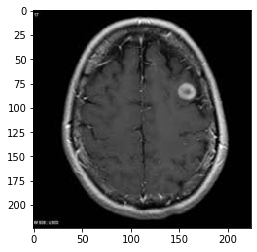

In [0]:
#show one training sample
from matplotlib import pyplot as plt
plt.imshow(X[5], interpolation='nearest')
plt.show()

Brain Tumor:

A brain tumor occurs when abnormal cells form within the brain. There are two main types of tumors: cancerous (malignant) tumors and benign tumors. Cancerous tumors can be divided into primary tumors, which start within the brain, and secondary tumors, which have spread from elsewhere, known as brain metastasis tumors. All types of brain tumors may produce symptoms that vary depending on the part of the brain involved. These symptoms may include headaches, seizures, problems with vision, vomiting and mental changes. The headache is classically worse in the morning and goes away with vomiting. Other symptoms may include difficulty walking, speaking or with sensations. As the disease progresses, unconsciousness may occur.

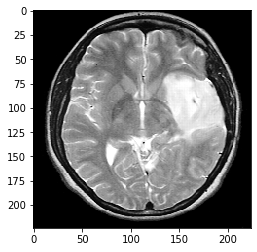

In [0]:
plt.imshow(X[9])

In [0]:
# normalize data
X = X.astype('float32')
X /= 255

In [0]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
len(data_target)

253

In [0]:
#split data
lenght = len(data_target)
index = np.arange(0,lenght,1)
len_train = round(lenght*0.7)
len_test = lenght - len_train
print ("train size :",len_train," test_size :",len_test)

train size : 177  test_size : 76


In [0]:

from random import sample
X_train, y_train, X_test, y_test = [],[],[],[]
test_index = sample(set(index), len_test)

for i in range(lenght):
    if i not in test_index:
        X_train.append(X[i])
        y_train.append(data_target[i])
    else:
        X_test.append(X[i])
        y_test.append(data_target[i])

X_train = np.squeeze(X_train)
y_train = np.asarray(y_train)
X_test = np.squeeze(X_test)
y_test = np.asarray(y_test)

print("X_train :",X_train.shape,
      "y_train :",y_train.shape,
     "\nX_test :",X_test.shape,
     "y_test :",y_test.shape)

X_train : (177, 224, 224, 3) y_train : (177,) 
X_test : (76, 224, 224, 3) y_test : (76,)


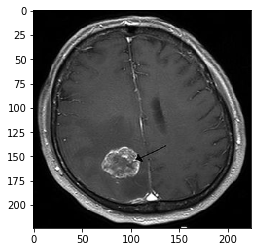

In [0]:
plt.imshow(X_train[59], interpolation='nearest')


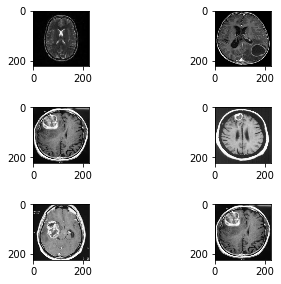

In [0]:
#random examples from x_train

import random
def random_example(X,y,rows,cols):
    row = 0
    col = 0
    f, axarr = plt.subplots(rows,cols)

    for i in range(3):
        for k in range(2):  
            rnd = random.randint(0,len(X))
            axarr[row,col].imshow(X[rnd],cmap='gray')
            if(y is not None):
                axarr[row,col].set_title("Has Tumor" if y[rnd] == 1 else "No Tumor")
            col += 1
        col = 0
        row += 1
        
    f.tight_layout(pad=0.9,h_pad=2.0)

    plt.show()
    
random_example(X_train,None,3,2)


#### Data Augmentation
##### As the input dataset size is comparatively smaller, data augmentation technique is performed to increase the traing set data.

In [0]:
#Data Augmentation
import skimage as sk

class Augmentation:
    def __init__(self):
        pass
        
    def random_rotation(self,data,label):
        # pick a random degree of rotation between 25% on the left and 25% on the right
        augmented_images = []
        augmented_label = []
        random_degree = random.uniform(-25, 25)
        counter = 0
        for img in data:
            img = sk.transform.rotate(img, random_degree)
            augmented_images.append(img)
            augmented_label.append(label[counter])
            counter += 1
        return (augmented_images,augmented_label)
    
    # add random noise to the image
    def random_noise(self,data,label):
        augmented_images = []
        augmented_label = []
        counter = 0
        for img in data:
            img = sk.util.random_noise(img)
            augmented_images.append(img)
            augmented_label.append(label[counter])
            counter += 1
        
        return (augmented_images,augmented_label)

    def horizontal_flip(self,data,label):
        # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
        counter = 0
        augmented_images = []
        augmented_label = []
        for img in data:
            img = img[:, ::-1]
            augmented_images.append(img)
            augmented_label.append(label[counter])
            counter += 1
        return (augmented_images,augmented_label)
    
    def vertical_flip(self,data,label):
        counter = 0
        augmented_images = []
        augmented_label = []
        for img in data:
            img = np.flip(img)
            augmented_images.append(img)
            augmented_label.append(label[counter])
            counter += 1
        return (augmented_images,augmented_label)
  
AUG = Augmentation()

(x_noise,y_noise) = AUG.random_noise(X_train,y_train)
(x_h_flipped,y_h_flipped) = AUG.horizontal_flip(X_train,y_train)
(x_v_flipped,y_v_flipped) = AUG.vertical_flip(X_train,y_train)
(x_rotated,y_rotated) = AUG.random_rotation(X_train,y_train)

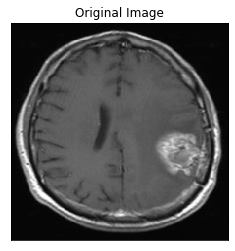

In [0]:
plt.imshow(X_train[0])
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.show()


Example of an image how does the augmentation look like.

#### VGG16

##### It usually refers to a deep convolutional network for object recognition developed and trained by Oxford's renowned Visual Geometry Group (VGG), which achieved very good performance on the ImageNet dataset.

##### The VGG-16 model is a 16-layer (convolution and fully connected) network built on the ImageNet database, which is built for the purpose of image recognition and classification.

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.optimizers import Adam

from keras.applications.vgg16 import VGG16

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
y_train.shape

(177, 2)

In [0]:

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
y = dict()
y[0] = []
y[1] = []
for set_name in (y_train,  y_test):
    y[0].append(np.sum(set_name == 0))
    y[1].append(np.sum(set_name == 1))

trace0 = go.Bar(
    x=['Train Set', 'Test Set'],
    y=y[0],
    name='No',
    marker=dict(color='#33cc33'),
    opacity=0.7
)
trace1 = go.Bar(
    x=['Train Set', 'Test Set'],
    y=y[1],
    name='Yes',
    marker=dict(color='#ff3300'),
    opacity=0.7
)
data = [trace0, trace1]
layout = go.Layout(
    title='Count of classes in each set',
    xaxis={'title': 'Set'},
    yaxis={'title': 'Count'}
)
fig = go.Figure(data, layout)
iplot(fig)

In [0]:
model_vgg = VGG16(weights=None, include_top=False, input_shape = (224, 224, 3))#default imagenet

#for layer in model.layers[:5]:
#    layer.trainable = True

x = model_vgg.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
final = Dense(2, activation="sigmoid")(x)
model_final = Model(input = model_vgg.input, output = final)
model_vgg.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_______

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning:

Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`



In [0]:
model_final.compile(loss='categorical_crossentropy',
             optimizer=Adam(),
             metrics=['acc'])

In [0]:
hist = model_final.fit(X_train,y_train,
         batch_size=32,
         epochs=10,
         validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 177 samples, validate on 76 samples
Epoch 1/10





177/177 [==============================] - 378s 2s/step - loss: 5.8623 - acc: 0.5424 - val_loss: 4.6658 - val_acc: 0.7105
Epoch 2/10
177/177 [==============================] - 370s 2s/step - loss: 6.9208 - acc: 0.5706 - val_loss: 4.6658 - val_acc: 0.7105
Epoch 3/10
177/177 [==============================] - 370s 2s/step - loss: 6.9208 - acc: 0.5706 - val_loss: 4.6658 - val_acc: 0.7105
Epoch 4/10
177/177 [==============================] - 379s 2s/step - loss: 6.9208 - acc: 0.5706 - val_loss: 4.6658 - val_acc: 0.7105
Epoch 5/10
177/177 [==============================] - 368s 2s/step - loss: 6.9208 - acc: 0.5706 - val_loss: 4.6658 - val_acc: 0.7105
Epoch 6/10
177/177 [==============================] - 370s 2s/step - loss: 6.9208 - acc: 0.5706 - val_loss: 4.6658 - val_acc: 0.7105
Epoch 7/10
177/177 [==============================] - 3

Model Performance

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning:

Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.



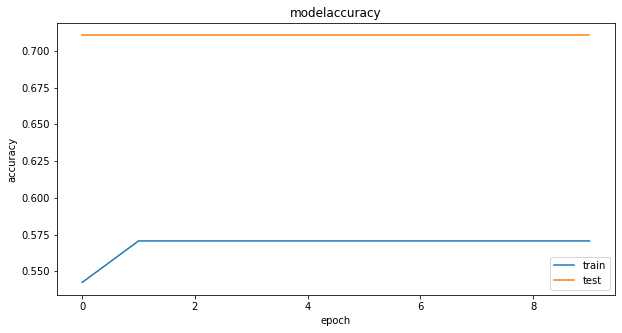

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning:

Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.



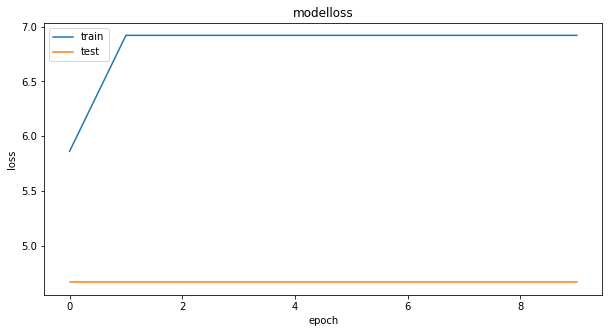

In [0]:
def draw_history(history,figsize=(10,5)):
    ax,_ = plt.subplots(figsize=figsize)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('modelaccuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'],loc='upperleft')
    plt.show()
    ax,_ = plt.subplots(figsize=figsize)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('modelloss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'],loc='upperleft')
    plt.show()
    
draw_history(hist)

Results:

Accuracy achieved is 80%. 

**VGG16 Transfer Learning **

transfer learning is a technique whereby a neural network model is first trained on a problem similar to the problem that is being solved. Transfer learning has the benefit of decreasing the training time for a neural network model and can result in lower generalization error.

In [0]:
model_vgg = VGG16(weights="imagenet", include_top=False, input_shape = (224, 224, 3))#default imagenet

#for layer in model.layers[:5]:
#    layer.trainable = True

x = model_vgg.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
final = Dense(2, activation="sigmoid")(x)
model_final = Model(input = model_vgg.input, output = final)
model_final.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning:

Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`



In [0]:
model_vgg = VGG16(weights="imagenet", include_top=False, input_shape = (224, 224, 3))#default imagenet

x = model_vgg.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
final = Dense(2, activation="sigmoid")(x)
model_final = Model(input = model_vgg.input, output = final)
model_final.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning:

Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`



In [0]:
model_final.compile(loss='categorical_crossentropy',
             optimizer=Adam(),
             metrics=['acc'])

In [0]:
hist = model_final.fit(X_train,y_train,
         batch_size=32,
         epochs=10,
         validation_data=(X_test, y_test))

Train on 177 samples, validate on 76 samples
Epoch 1/10
177/177 [==============================] - 372s 2s/step - loss: 6.0527 - acc: 0.5593 - val_loss: 4.6658 - val_acc: 0.7105
Epoch 2/10
177/177 [==============================] - 372s 2s/step - loss: 6.9208 - acc: 0.5706 - val_loss: 4.6658 - val_acc: 0.7105
Epoch 3/10
177/177 [==============================] - 372s 2s/step - loss: 6.9208 - acc: 0.5706 - val_loss: 4.6658 - val_acc: 0.7105
Epoch 4/10
177/177 [==============================] - 370s 2s/step - loss: 6.9208 - acc: 0.5706 - val_loss: 4.6658 - val_acc: 0.7105
Epoch 5/10
177/177 [==============================] - 367s 2s/step - loss: 6.9208 - acc: 0.5706 - val_loss: 4.6658 - val_acc: 0.7105
Epoch 6/10
177/177 [==============================] - 369s 2s/step - loss: 6.9208 - acc: 0.5706 - val_loss: 4.6658 - val_acc: 0.7105
Epoch 7/10
177/177 [==============================] - 369s 2s/step - loss: 6.9208 - acc: 0.5706 - val_loss: 4.6658 - val_acc: 0.7105
Epoch 8/10
177/177 [====

Model Performance of Vgg with transfer learning

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning:

Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.



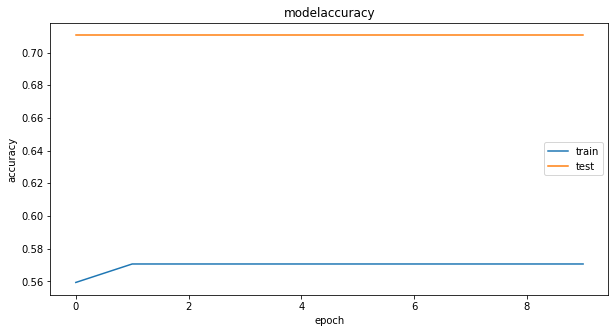

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning:

Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.



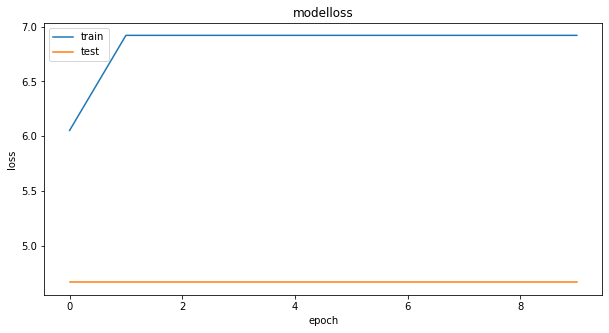

In [0]:
def draw_history(history,figsize=(10,5)):
    ax,_ = plt.subplots(figsize=figsize)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('modelaccuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'],loc='upperleft')
    plt.show()
    ax,_ = plt.subplots(figsize=figsize)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('modelloss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'],loc='upperleft')
    plt.show()
    
draw_history(hist)

#### MobileNet

TensorFlow is an open-source library for numeric computation using dataflow graphs. It was developed by Google brain team as a proprietary machine learning system based on deep learning neural networks.

We used a special class of convolutional neural networks called MobileNets. They are optimized to be executed using minimal possible computing power.

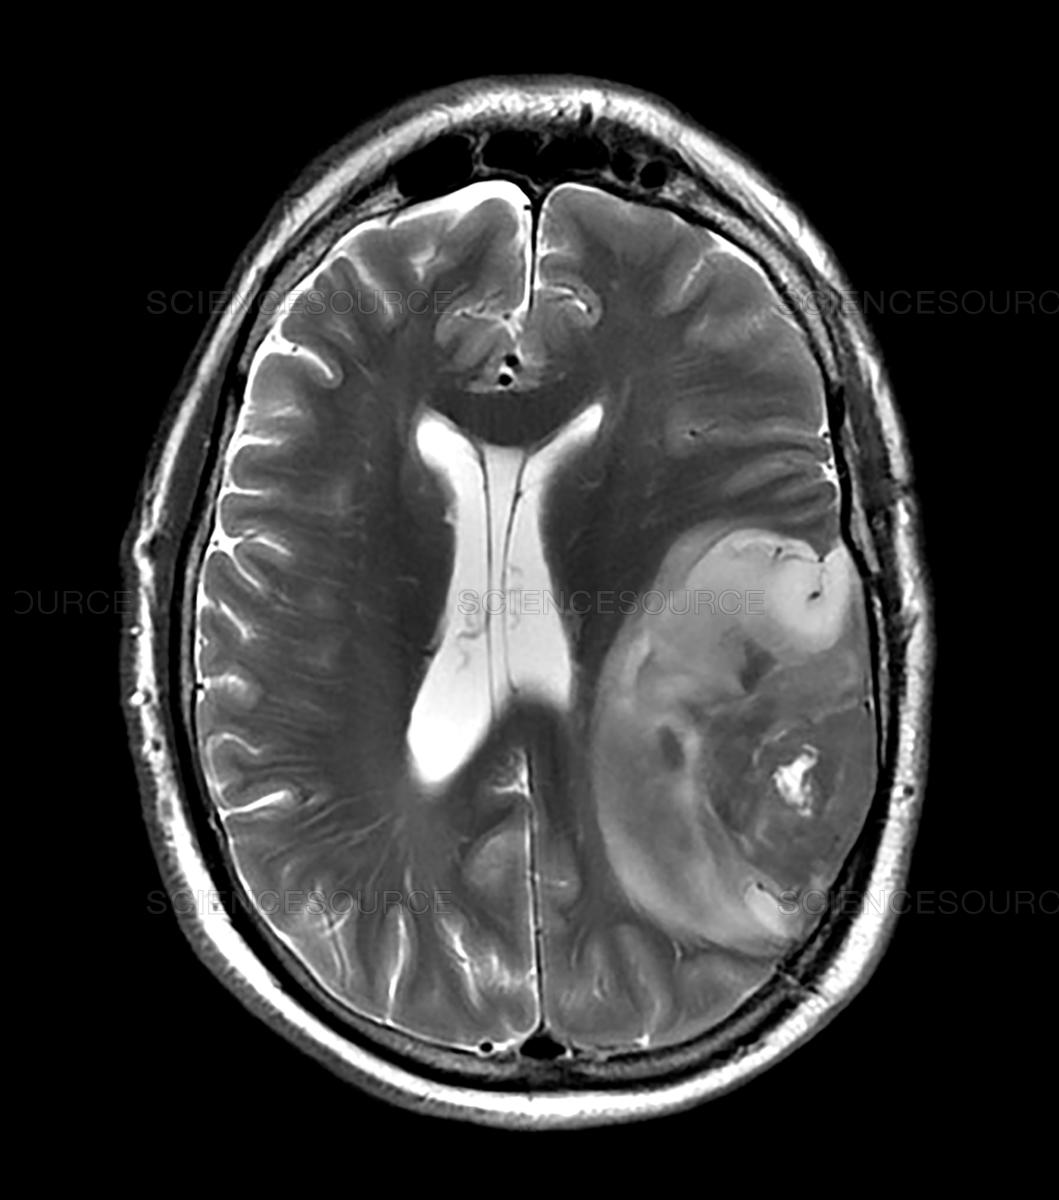

In [0]:
# display some example images from the "no" folder (healthy brain MRIs) 

from IPython.display import Image, display
display(Image('/content/drive/My Drive/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y108.jpg', width=200, height=200))



In [0]:
!pip install "tensorflow_hub==0.4.0"

     |████████████████████████████████| 81kB 3.0MB/s 
  Found existing installation: tensorflow-hub 0.7.0
    Uninstalling tensorflow-hub-0.7.0:
      Successfully uninstalled tensorflow-hub-0.7.0


In [0]:
import numpy as np 
import pandas as pd 
import os , shutil
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.keras import layers

print(tf.__version__)
print(keras.__version__)

1.15.0
2.2.4-tf


In [0]:
patient_folder = os.listdir('/content/drive/My Drive/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes')
healthy_folder = os.listdir('/content/drive/My Drive/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no')


In [0]:
np.random.shuffle(patient_folder)
print('some of images in the patient folder after shuffling', patient_folder[0:10])

np.random.shuffle(healthy_folder)
print('some of images in the patient folder after shuffling', healthy_folder[0:10])

some of images in the patient folder after shuffling ['Y76.jpg', 'Y193.JPG', 'Y183.jpg', 'Y53.jpg', 'Y104.jpg', 'Y56.jpg', 'Y168.jpg', 'Y107.jpg', 'Y46.jpg', 'Y33.jpg']
some of images in the patient folder after shuffling ['N21.jpg', 'no 98.jpg', '31 no.jpg', 'no 9.png', '10 no.jpg', '33 no.jpg', '37 no.jpg', 'no 6.jpg', 'N22.JPG', '45 no.jpg']


In [0]:
len_training_portion = int(np.floor(0.7*len(patient_folder)))
len_test_portion = int(np.floor(0.15*len(patient_folder)))

train_patient  = patient_folder[0:len_training_portion].copy() 
val_patient = patient_folder[len_training_portion:(len_training_portion + len_test_portion)].copy()
test_patient = patient_folder[(len_training_portion + len_test_portion):].copy()

print('length of the patient folder is {} from which we placed {} for the training, {} for the validation, {} for the test '.
      format(len(patient_folder) , len(train_patient) , len(val_patient), len(test_patient) ) )


length of the patient folder is 155 from which we placed 108 for the training, 23 for the validation, 24 for the test 


In [0]:
len_training_portion = int(np.floor(0.7*len(healthy_folder)))
len_test_portion = int(np.floor(0.15*len(healthy_folder)))

train_healthy  = healthy_folder[0:len_training_portion] 
val_healthy = healthy_folder[len_training_portion:(len_training_portion + len_test_portion)]
test_healthy = healthy_folder[(len_training_portion + len_test_portion):]

print('length of the healthy folder is {} from which we placed {} for the training, {} for the validation, {} for the test '.
      format(len(healthy_folder), len(train_healthy) , len(val_healthy), len(test_healthy) ))

length of the healthy folder is 98 from which we placed 68 for the training, 14 for the validation, 16 for the test 


In [0]:
training_data = train_patient + train_healthy
validation_data = val_patient + val_healthy
test_data = test_patient + test_healthy

print('The length of training data after concatenation is ', len(training_data))
print('The length of val data after concatenation is ', len(validation_data))
print('The length of test data after concatenation is ', len(test_data))

The length of training data after concatenation is  176
The length of val data after concatenation is  37
The length of test data after concatenation is  40


Let's make a directory where we store our training and test data sets separately

In [0]:
# The original directory 

original_dataset_dir_patients = '/content/drive/My Drive/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes'
original_dataset_dir_healthy = '/content/drive/My Drive/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no'

# The directory where we will store our dataset
base_dir = 'splitted_data'

# Directories for our training, validation, and test splits
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Directories with our training, validation, testing patient & healthy MRI images
train_patients_dir = os.path.join(train_dir, 'patients')
train_healthy_dir = os.path.join(train_dir, 'healthy')

val_patients_dir = os.path.join(val_dir, 'patients')
val_healthy_dir = os.path.join(val_dir, 'healthy')

test_patients_dir = os.path.join(test_dir, 'patients')
test_healthy_dir = os.path.join(test_dir, 'healthy')


In [0]:
# make the directories
os.mkdir(base_dir)

os.mkdir(train_dir)
os.mkdir(val_dir)
os.mkdir(test_dir)

os.mkdir(train_patients_dir)
os.mkdir(train_healthy_dir)

os.mkdir(val_patients_dir)
os.mkdir(val_healthy_dir)

os.mkdir(test_patients_dir)
os.mkdir(test_healthy_dir)

In [0]:
# check whether the directories are made
print('######################### the root directory')
!ls
print('######################### the created directories')
!ls splitted_data
print('######################### the created directories inside the splitted_data train')
!ls splitted_data/train
print('######################### the created directories inside the splitted_data validation')
!ls splitted_data/val
print('######################### the created directories inside the splitted_data test')
!ls splitted_data/test

######################### the root directory
brain_tumor_detection_cnn	 no		the_best_model.ckpt
brain_tumor_detection_restnet50  splitted_data	yes
######################### the created directories
test  train  val
######################### the created directories inside the splitted_data train
healthy  patients
######################### the created directories inside the splitted_data validation
healthy  patients
######################### the created directories inside the splitted_data test
healthy  patients


Now it is time to move the images from the downloaded direactory to the newly created directories to be used as the destination for Keras Image Generators

In [0]:
def copy_files(fnames , from_dir, to_dir):
    for fname in fnames:
        src = os.path.join(from_dir, fname)
        dst = os.path.join(to_dir, fname)
        shutil.copyfile(src, dst)

        
copy_files(train_patient, original_dataset_dir_patients , train_patients_dir)
copy_files(train_healthy, original_dataset_dir_healthy , train_healthy_dir)

copy_files(val_patient, original_dataset_dir_patients , val_patients_dir)
copy_files(val_healthy, original_dataset_dir_healthy , val_healthy_dir)

copy_files(test_patient, original_dataset_dir_patients , test_patients_dir)
copy_files(test_healthy, original_dataset_dir_healthy , test_healthy_dir)


Time for initializing the Keras Image Generators


In [0]:
img_res = 224 # if we are using MobileNet_V2
### initialize the image data generator for training data
image_gen_train = keras.preprocessing.image.ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest')

### flow the training data from directory while they are resized 
train_generator = image_gen_train.flow_from_directory(
        train_dir, target_size=(img_res, img_res), class_mode='binary')

### initialize the image data generator for validation data
image_gen_val = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest')

### flow the validation data from directory while they are resized 
val_generator = image_gen_val.flow_from_directory(
        val_dir, target_size=(img_res, img_res), class_mode='binary')

Found 253 images belonging to 2 classes.
Found 151 images belonging to 2 classes.


transfer learning using MobileNet V2

In [0]:

##### we can also use tensorflow_hub for a pretrained MobileNet V2 
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL, input_shape=(img_res, img_res,3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
feature_extractor.trainable = False

def create_model():
  model = keras.Sequential()
  model.add(feature_extractor)
  
  model.add(layers.BatchNormalization())
  
  model.add(layers.Dense(128, activation = 'relu'))
  model.add(layers.Dropout(0.5))
  
  model.add(layers.Dense(1, activation='sigmoid'))

  return model

model = create_model()


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
batch_normalization (BatchNo (None, 1280)              5120      
_________________________________________________________________
dense (Dense)                (None, 128)               163968    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,427,201
Trainable params: 166,657
Non-trainable params: 2,260,544
_________________________________________________________________


In [0]:
          
model.compile(
  optimizer=keras.optimizers.Adam(),
  loss='binary_crossentropy',
  metrics=['accuracy' ])

In [0]:
filepath="the_best_model.ckpt"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
 
history = model.fit_generator(
      train_generator,
      steps_per_epoch=5,
      epochs=10,
      validation_data=val_generator,
      validation_steps=5,
      callbacks = [checkpoint])

Epoch 1/10
5/5 [==============================] - 40s 8s/step - loss: 0.8544 - acc: 0.5033

Epoch 00001: val_acc improved from -inf to 0.50331, saving model to the_best_model.ckpt
5/5 [==============================] - 70s 14s/step - loss: 1.1416 - acc: 0.4841 - val_loss: 0.8544 - val_acc: 0.5033
Epoch 2/10
5/5 [==============================] - 9s 2s/step - loss: 0.8961 - acc: 0.5033

Epoch 00002: val_acc did not improve from 0.50331
5/5 [==============================] - 26s 5s/step - loss: 0.8039 - acc: 0.6497 - val_loss: 0.8961 - val_acc: 0.5033
Epoch 3/10
5/5 [==============================] - 8s 2s/step - loss: 0.8699 - acc: 0.5695

Epoch 00003: val_acc improved from 0.50331 to 0.56954, saving model to the_best_model.ckpt
5/5 [==============================] - 24s 5s/step - loss: 0.7374 - acc: 0.7063 - val_loss: 0.8699 - val_acc: 0.5695
Epoch 4/10
5/5 [==============================] - 8s 2s/step - loss: 0.7782 - acc: 0.6026

Epoch 00004: val_acc improved from 0.56954 to 0.60265,

Model Performance of MobileNet

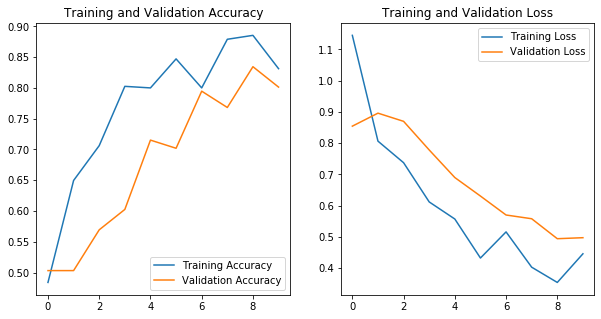

In [0]:
def plot_history(history):
  
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = np.arange(len(history.history['loss']))

  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  #plt.savefig('./foo.png')
  plt.show()
    
plot_history(history)

In [0]:
###### loading the best model for MobileNet
best_model = keras.models.load_model("the_best_model.ckpt" , custom_objects={'KerasLayer':hub.KerasLayer})


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:

###### initializing a test data generator
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir, target_size=(img_res, img_res), batch_size=40, class_mode='binary')

test_loss, test_acc = best_model.evaluate_generator(test_generator, steps=1)
print('test acc:', test_acc)

Found 160 images belonging to 2 classes.
test acc: 0.75


#### ResNet
Identity shortcut connection that skips one or more layers.
Artificial neural network (ANN) of a kind that builds on constructs known from pyramidal cells in the cerebral cortex. Residual neural networks do this by utilizing skip connections, or shortcuts to jump over some layers. Typical ResNet models are implemented with double- or triple- layer skips that contain nonlinearities (ReLU) and batch normalization in between.

In [0]:
IMG_WIDTH=224
IMG_HEIGHT=224
IMG_DIM = (IMG_WIDTH, IMG_HEIGHT)

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras

restnet = ResNet50(include_top=False, weights='imagenet', 
                   input_shape=(IMG_HEIGHT,IMG_WIDTH,3))
output = restnet.layers[-1].output
output = keras.layers.Flatten()(output)
restnet = Model(restnet.input, output=output)
for layer in restnet.layers:
    layer.trainable = False
restnet.summary()


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning:

The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.



94658560/94653016 [==============================] - 1s 0us/step
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning:

Update your `Model` call to the Keras 2 API: `Model(Tensor("in..., outputs=Tensor("fl...)`



In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
model = Sequential()
model.add(restnet)
model.add(Dense(512, activation='relu', input_dim=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_4 (Model)              (None, 100352)            23587712  
_________________________________________________________________
dense_11 (Dense)             (None, 512)               51380736  
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 513       
Total params: 75,231,617
Trainable params: 51,643,905
Non-trainable params: 23,587,712
_________________________________

In [0]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=1, 
                              epochs=3,
                              validation_data=val_generator, 
                              validation_steps=1, 
                              verbose=1)

Epoch 1/3
1/1 [==============================] - 29s 29s/step - loss: 0.7922 - acc: 0.7241 - val_loss: 0.6843 - val_acc: 0.5938
Epoch 2/3
1/1 [==============================] - 18s 18s/step - loss: 2.4329 - acc: 0.5000 - val_loss: 1.1179 - val_acc: 0.2812
Epoch 3/3
1/1 [==============================] - 18s 18s/step - loss: 1.4595 - acc: 0.4375 - val_loss: 0.6860 - val_acc: 0.4688


In [0]:
model.save('brain_tumor_detection_restnet50')

In [0]:
import tensorflow_hub as hub
resnet_model = keras.models.load_model("brain_tumor_detection_restnet50" , custom_objects={'KerasLayer':hub.KerasLayer})

In [0]:
###### initializing a test data generator

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir, target_size=(img_res, img_res), batch_size=40, class_mode='binary')
test_loss, test_acc = resnet_model.evaluate_generator(test_generator, steps=1)
print('test acc:', test_acc)

Found 160 images belonging to 2 classes.
test acc: 0.550000011920929


#### CNN
CNNs are powerful image processing, artificial intelligence (AI) that use deep learning to perform both generative and descriptive tasks, often using machine vison that includes image and video recognition.

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, AveragePooling2D
from keras.models import Sequential
from keras import optimizers

In [0]:
# MODEL
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
# COMPILE
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_50 (Activation)   (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_51 (Activation)   (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)       

In [0]:
model_cnn=model.fit_generator(
        train_generator,
        steps_per_epoch=5,
        epochs=10,
        validation_data=val_generator,
        validation_steps=5
        )

Epoch 1/10
5/5 [==============================] - 24s 5s/step - loss: 2.1359 - acc: 0.5258 - val_loss: 0.6500 - val_acc: 0.6291
Epoch 2/10
5/5 [==============================] - 17s 3s/step - loss: 0.6824 - acc: 0.5875 - val_loss: 0.6787 - val_acc: 0.6291
Epoch 3/10
5/5 [==============================] - 13s 3s/step - loss: 0.7129 - acc: 0.5416 - val_loss: 0.6499 - val_acc: 0.6291
Epoch 4/10
5/5 [==============================] - 17s 3s/step - loss: 0.6701 - acc: 0.6125 - val_loss: 0.6396 - val_acc: 0.6358
Epoch 5/10
5/5 [==============================] - 16s 3s/step - loss: 0.6352 - acc: 0.6550 - val_loss: 0.6658 - val_acc: 0.6291
Epoch 6/10
5/5 [==============================] - 14s 3s/step - loss: 0.6816 - acc: 0.6116 - val_loss: 0.6414 - val_acc: 0.6291
Epoch 7/10
5/5 [==============================] - 17s 3s/step - loss: 0.6463 - acc: 0.6125 - val_loss: 0.6208 - val_acc: 0.6490
Epoch 8/10
5/5 [==============================] - 15s 3s/step - loss: 0.6431 - acc: 0.6492 - val_loss: 0

In [0]:
model.save('brain_tumor_detection_cnn')

In [0]:
import tensorflow_hub as hub
cnn_model = keras.models.load_model("brain_tumor_detection_cnn" , custom_objects={'KerasLayer':hub.KerasLayer})

In [0]:
# initializing a test data generator

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir, target_size=(img_res, img_res), batch_size=40, class_mode='binary')

test_loss, test_acc = cnn_model.evaluate_generator(test_generator, steps=1)
print('test acc:', test_acc) 

Found 160 images belonging to 2 classes.
test acc: 0.7749999761581421


Model Performance for CNN

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning:

Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.



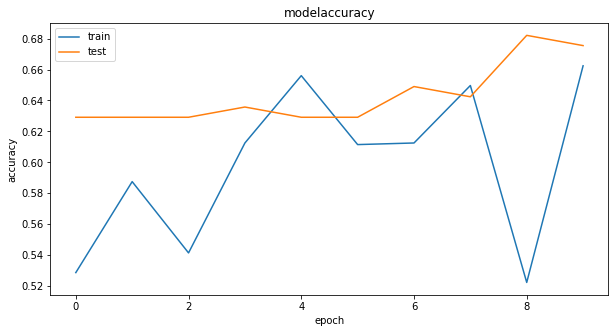

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning:

Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.



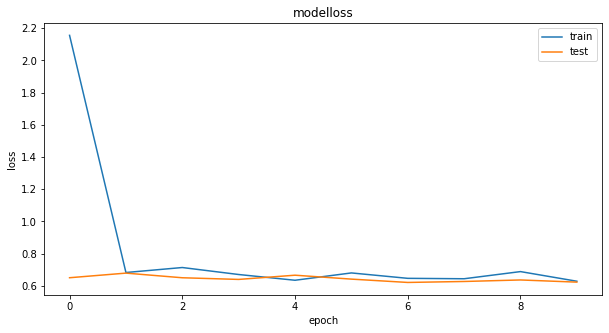

In [0]:
def draw_history(history,figsize=(10,5)):
    ax,_ = plt.subplots(figsize=figsize)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('modelaccuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'],loc='upperleft')
    plt.show()
    ax,_ = plt.subplots(figsize=figsize)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('modelloss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'],loc='upperleft')
    plt.show()
    
draw_history(model_cnn)


#### Analyses

Brain tumor is one of the most critical and highly risky disease. And we have analysed the brain MRI scan images using different neural network models to understand and predict if a person has tumor or not.

Data Augmentation is implemented to improve the model efficiency and also to avoid over fitting of the model. And Transfer learning is used for improvization and keep generalization rather than memorization.

Accuracy achieved through Convolutional neural network is 87%, VGG is 80%, VGG16 Transfer Learning is 81%, MobileNet is 85% and ResNet is 75%.